We'll be trying to predict hause price with regression models. 

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

import os
print(os.listdir("../input"))


['house-prices-advanced-regression-techniques']


In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(train.head())
print('**'* 50)
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train.info())
print('**'* 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

What is the data trying to say to us ? We need to analyse the data. Analysing data is the most important thing to understand what the data is telling us. 

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

We are going to convert train ad test data. And We are going to drop SalePrice column for predict.

# Data Visualization

Let's look at the point of visualization

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



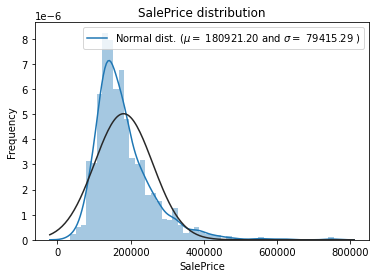

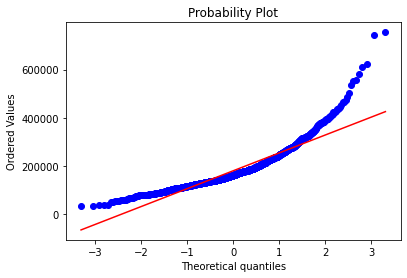

In [5]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

As you see the sale price value is right skewed. We need to make this normal distributed.

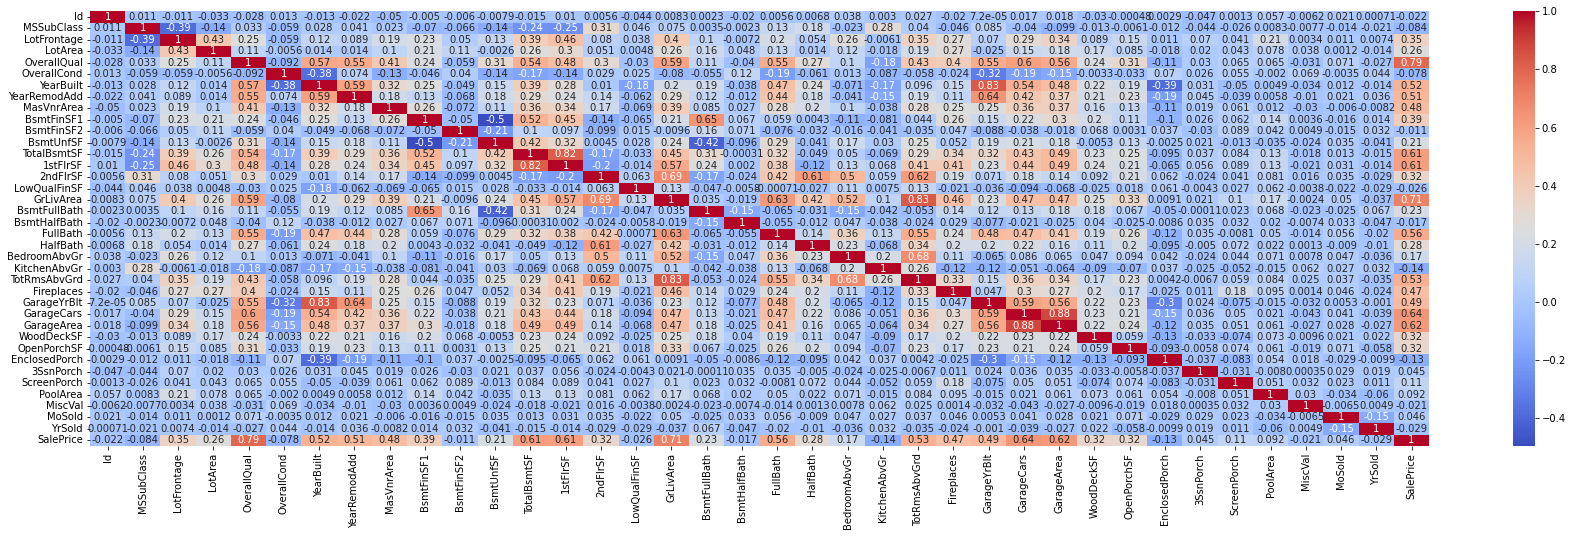

In [6]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

we can see the most corelated parameters in numerical values above plotting. And we can pick these as features for our macine learning model.

In [7]:
corr = train.corr()

In [8]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

We droped some columns that less than 0.3 of correlation of Sale Prices.

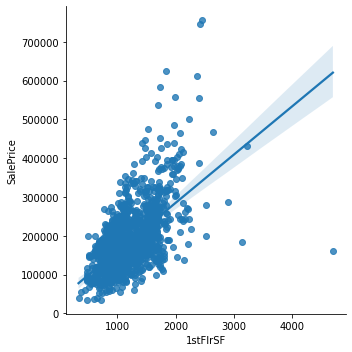

In [11]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) # 1stFlrSF seems very corelated with SalePrice.

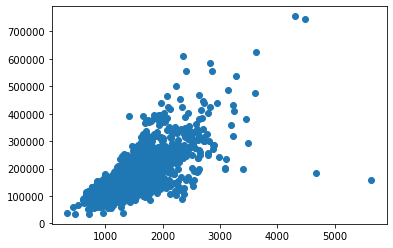

In [12]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

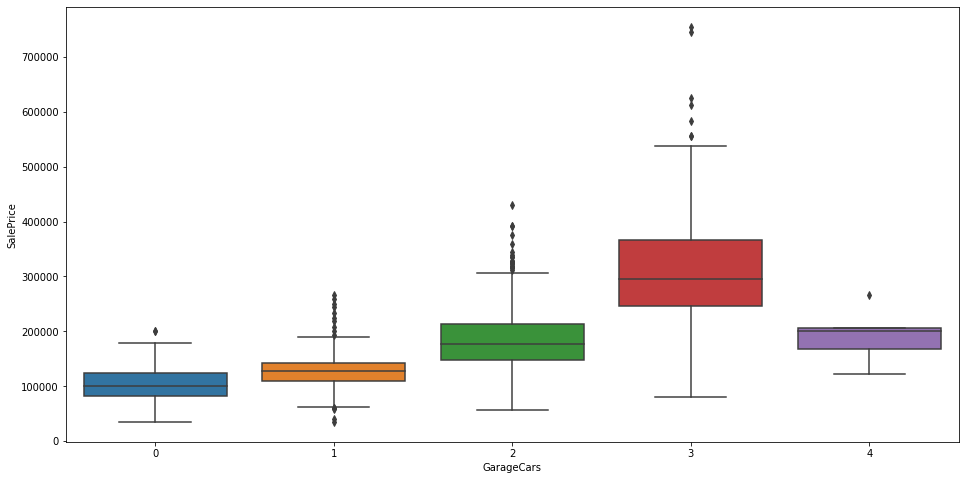

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

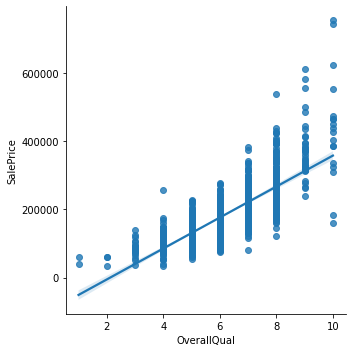

In [14]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

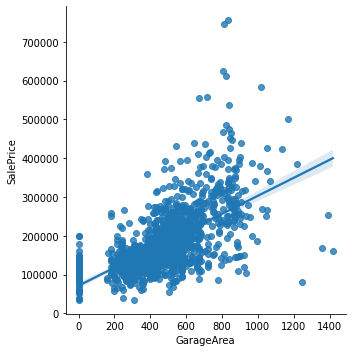

In [15]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)


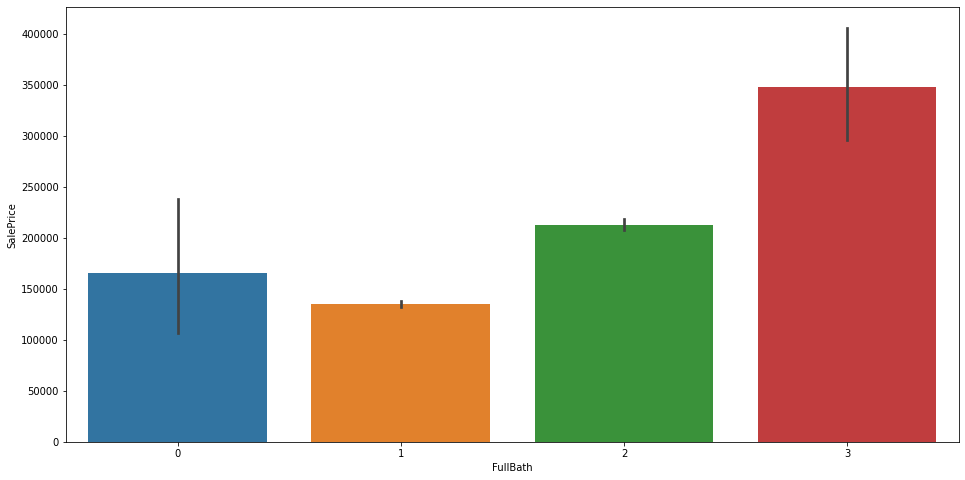

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

# Feature Engineering

We have to convert all columns into numeric or categorical data.

In [17]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


As we can see some of paremeters have a lot of missing values. That's why we should drop these from data. And we are going to drop parematers which total value is larger than 81.

In [18]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [19]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

We are going to do same thing to the test data

In [20]:
#missing data
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [21]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [22]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [23]:
train.isnull().sum().sort_values(ascending = False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

we need to handle missing data.

In [24]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [25]:
categorical_cols

[]

In [26]:
#data = pd.get_dummies(data, columns=categorical_cols)

In [27]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [28]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [29]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [30]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [31]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [32]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [33]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [34]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

Now we are going to pick some features for the model. For this we are going to use correlation matrix and we are going to pick most correlated with sale price.

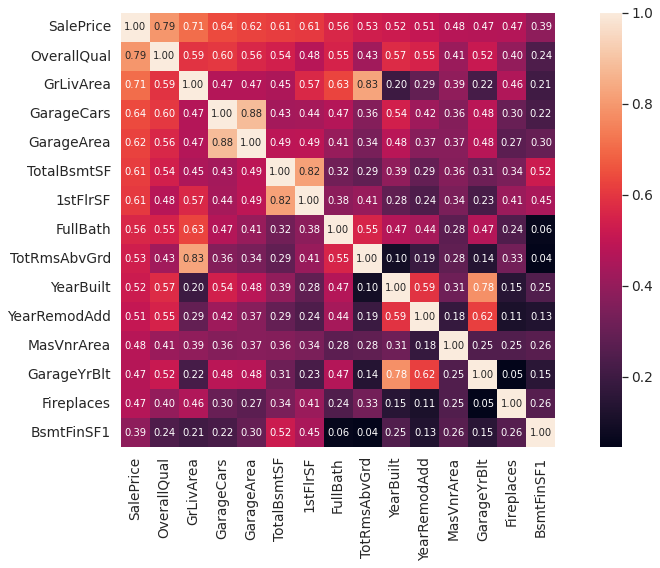

In [35]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
train = train[cols]

In [37]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [38]:
test=test[cols.drop('SalePrice')]

In [39]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtFinSF1       1
OverallQual      0
GrLivArea        0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
Fireplaces       0
dtype: int64

In [40]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [41]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

<a id="1"></a> <br>
# **Linear Regression **

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

<a id="1"></a> <br>
### **Train Test Split **
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [43]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [44]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

<a id="1"></a> <br>
### **Creating and Training the Model **

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


<a id="1"></a> <br>
### **Model Evaluation **
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [47]:
# print the intercept
print(lm.intercept_)

[6.60022817e-17]


In [48]:
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


<a id="1"></a> <br>
### **Predictions from our Model **
Let's grab predictions off our test set and see how well it did!

In [49]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

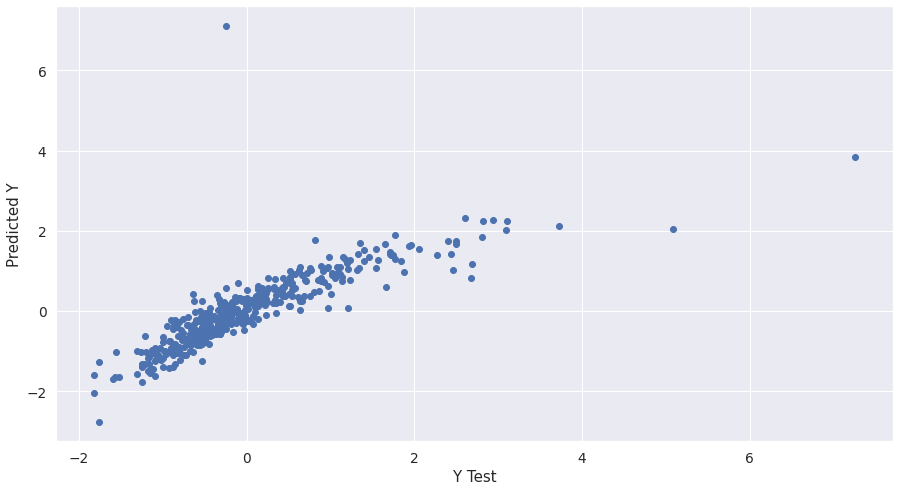

In [50]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

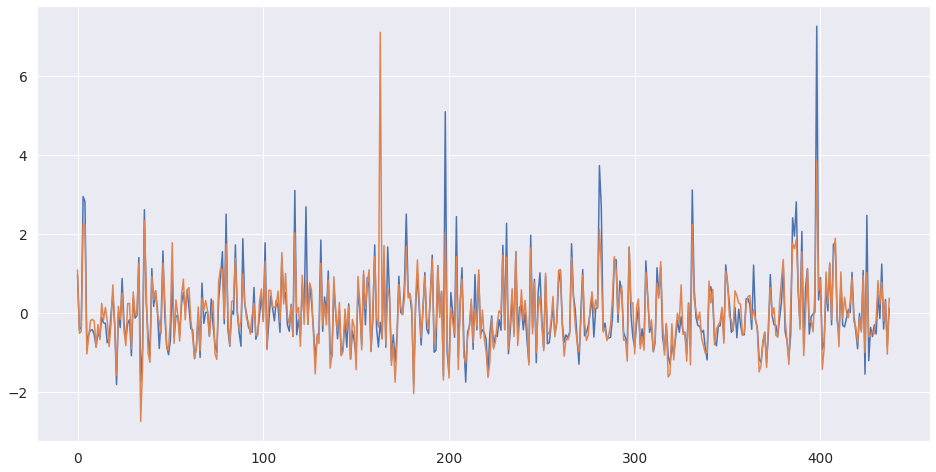

In [51]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()


<a id="1"></a> <br>
### **Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)
 
**Comparing these metrics**:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2910540797178433
MSE: 0.2999575602451759
RMSE: 0.5476838141164808


<a id="1"></a> <br>
# **Gradient Boosting Regression **

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. We are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices.

In [54]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=4)

In [56]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.22959248368942295
MSE: 0.11512609875411262
RMSE: 0.33930237068743363


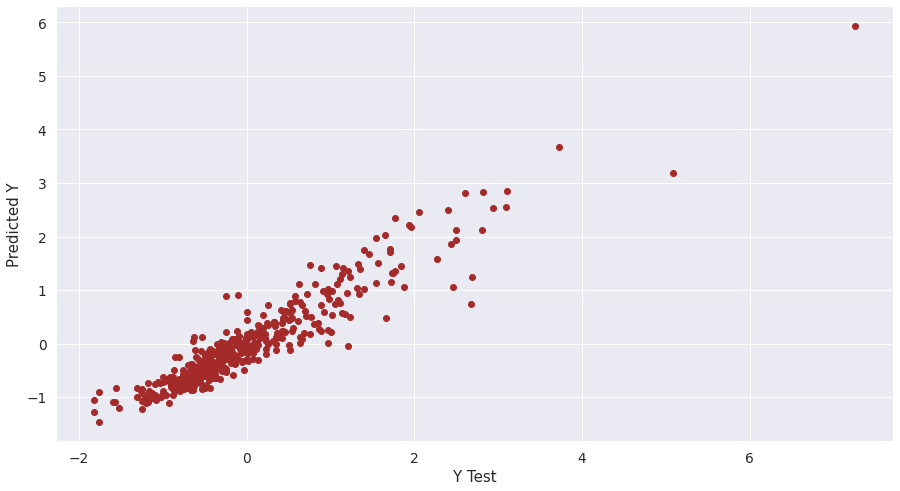

In [58]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

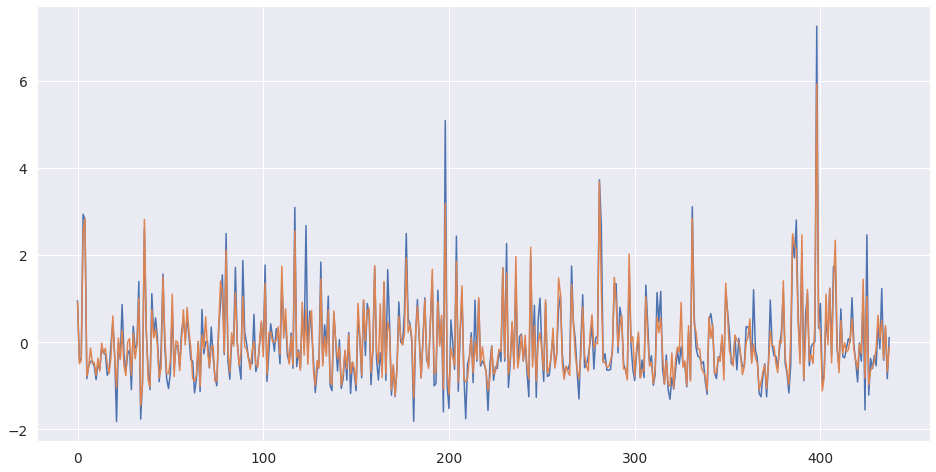

In [59]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

<a id="1"></a> <br>
# **Decision Tree Regression **


The decision tree is a simple machine learning model for getting started with regression tasks.

**Background**
A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).



In [60]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=100)

In [61]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


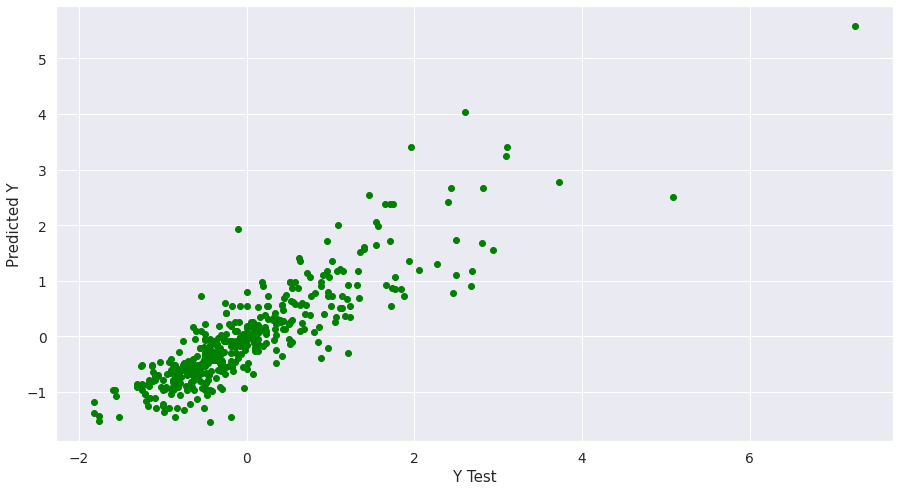

In [63]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Support Vector Machine Regression **

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.


![](https://www.saedsayad.com/images/SVR_1.png)
![](https://www.saedsayad.com/images/SVR_2.png)
***Linear SVR***
                                    ![](https://www.saedsayad.com/images/SVR_4.png)                     
                                    
                                    
                                    
                                    
***Non Linear SVR***

![](https://www.saedsayad.com/images/SVR_6.png)
![](https://www.saedsayad.com/images/SVR_5.png)

In [64]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [65]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.23401679589999025
MSE: 0.1899647870349416
RMSE: 0.43584950044131243


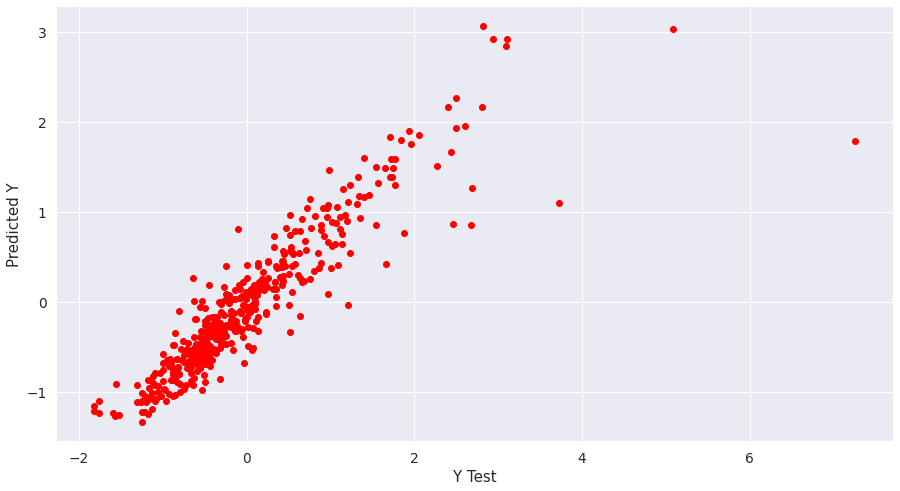

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

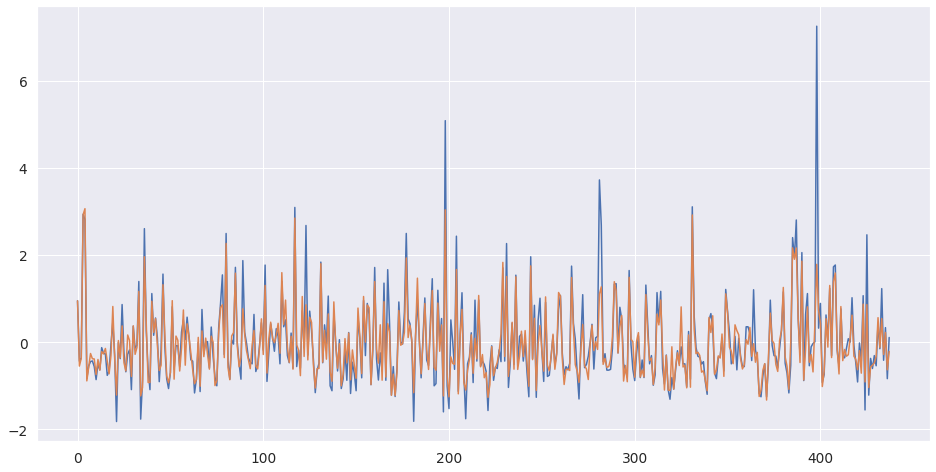

In [68]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

<a id="1"></a> <br>
# **Random Forest Regression **

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

![](https://cdn-images-1.medium.com/max/800/1*jEGFJCm4VSG0OzoqFUQJQg.jpeg)

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [70]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.2370348998220862
MSE: 0.15307085264058032
RMSE: 0.3912427029870082


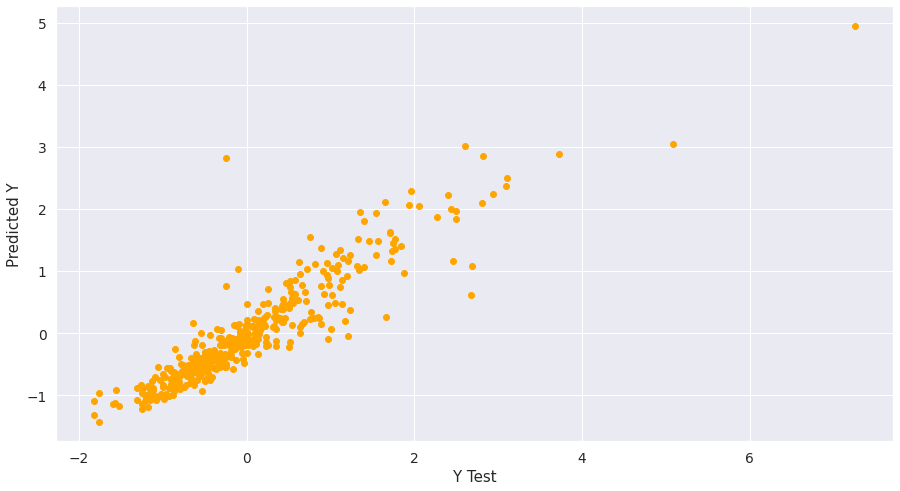

In [72]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

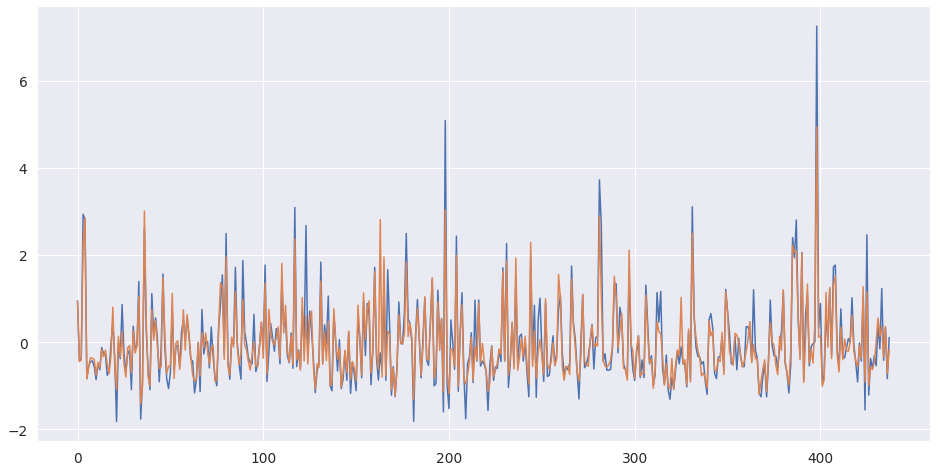

In [73]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

# LightGBM

In [74]:
import lightgbm as lgb

In [75]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [76]:
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [77]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.25506597810722104
MSE: 0.16677803376028932
RMSE: 0.4083846639631431


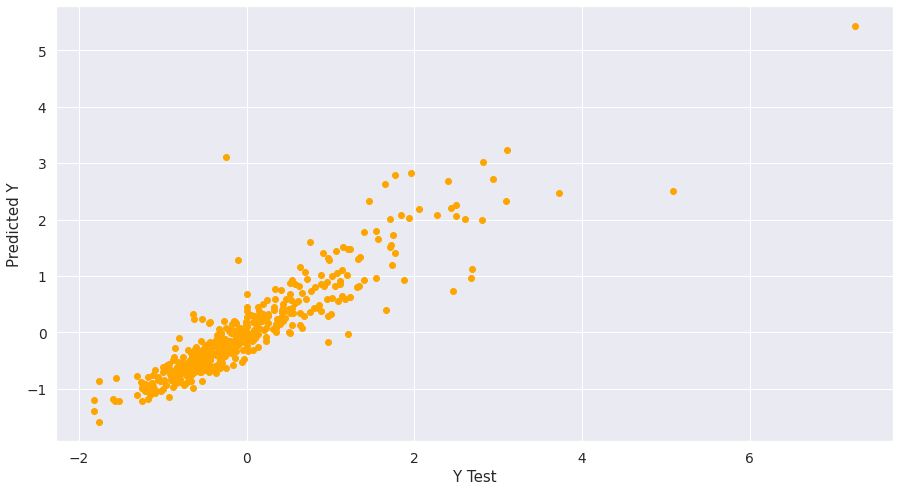

In [79]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

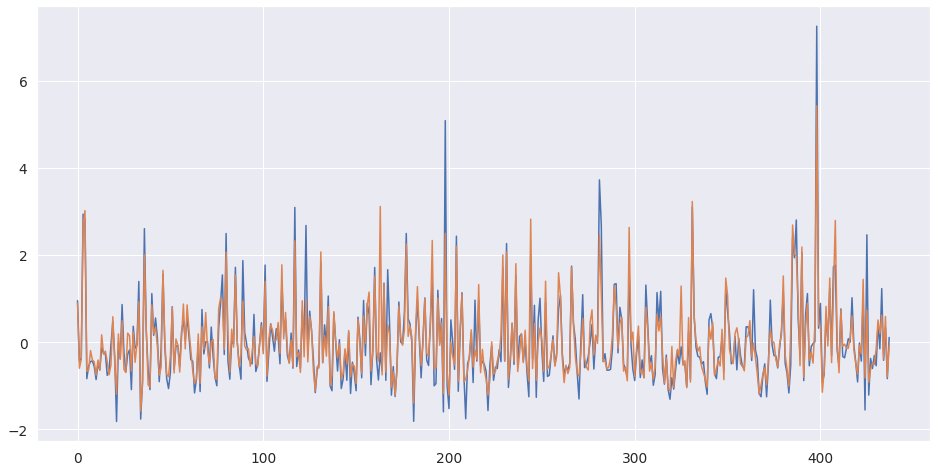

In [80]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lgb_pred, label = 'predict')
plt.show()

# Model Comparison

**We can say the best working model by loking MSE rates The best working model is Support Vector Machine.**
We are going to see the error rate. which one is better?


In [81]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

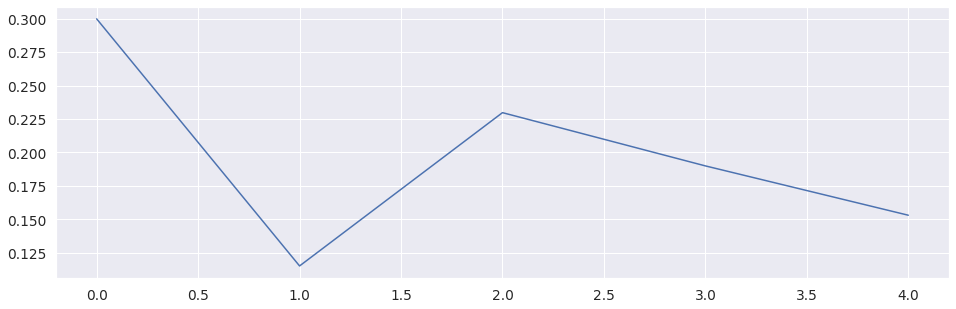

In [82]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

Now we will use test data .

In [83]:
a = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [84]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [85]:
test = sc_X.fit_transform(test)

In [86]:
test.shape

(1459, 14)

In [87]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

In [88]:
test_prediction_lgbm

array([[-0.78269669],
       [-0.36479555],
       [-0.02265629],
       ...,
       [-0.04654838],
       [-0.7710944 ],
       [ 0.923539  ]])

In [89]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [90]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [91]:
test_prediction_lgbm.head()

,SalePrice
0,117227.991920
1,150378.992919
2,177520.003343
3,181965.769410
4,193483.994479


In [92]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [93]:
result.head()

,Id,SalePrice
0,1461,117227.991920
1,1462,150378.992919
2,1463,177520.003343
3,1464,181965.769410
4,1465,193483.994479


In [94]:
result.to_csv('submission.csv',index=False)

If you like it, please vote :)